In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/WEB_MINING_PROJECT/'
except ImportError as e:
    pass

Mounted at /content/drive/
/content/drive/My Drive/WEB_MINING_PROJECT


#Importing packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import nltk
import random
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import spacy
!pip install pyspellchecker
from spellchecker import SpellChecker

#initializing seed for consistent results
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load English language model for SpaCy
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Loading dataset

In [ ]:
# Load the dataset
df = pd.read_csv("1429_1.csv")
df.head()

<ipython-input-3-4e25da04f73e>:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("1429_1.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

#Text Preprocessing

In [ ]:
# Drop rows with missing review text
df = df.dropna(subset=['reviews.text'])

# Text normalization
def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    return text

# I have commented Spelling error correction, it takes so much time might be goes under infinity loop anyone can try to look
"""# Spelling error correction
def correct_spelling(text):
    spell = SpellChecker()
    corrected_text = []
    # Tokenize text
    words = word_tokenize(text)
    for word in words:
        # Correct spelling errors
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_text.append(corrected_word)
    return " ".join(corrected_text)"""

# Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Stopword removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Stemming (optional)
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Apply preprocessing steps
df.loc['preprocessed_text'] = df['reviews.text'].apply(normalize_text)
"""df['preprocessed_text'] = df['preprocessed_text'].apply(correct_spelling)"""
df.['preprocessed_text'] = df['preprocessed_text'].apply(tokenize_text)
df['preprocessed_text'] = df['preprocessed_text'].apply(remove_stopwords)
df['preprocessed_text'] = df['preprocessed_text'].apply(lemmatize_text)
df['preprocessed_text'] = df['preprocessed_text'].apply(stem_text)

# Now, df['preprocessed_text'] contains the preprocessed text data

<ipython-input-5-c5b1af1e4c90>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df['reviews.text'].apply(normalize_text)


#Distribution of ratings

<ipython-input-6-0572432e7ee9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['reviews.rating'], palette="Blues")


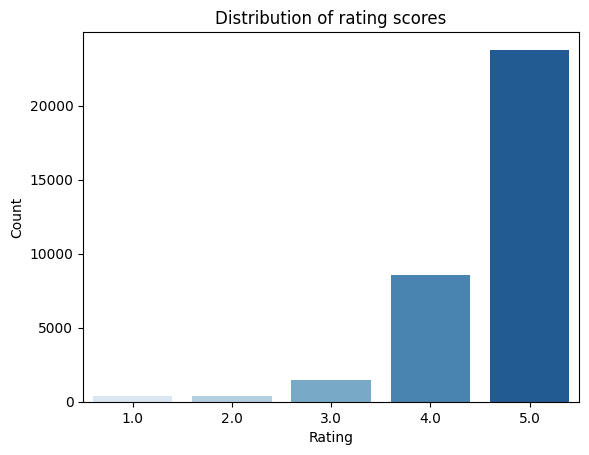

In [ ]:
# distribution of rating
sns.countplot(x=df['reviews.rating'], palette="Blues")

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Map ratings to sentiments
def map_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['reviews.rating'].apply(map_sentiment)

# Separate positive, negative, and neutral reviews
positive_reviews = df[df['sentiment'] == 'Positive']
negative_reviews = df[df['sentiment'] == 'Negative']
neutral_reviews = df[df['sentiment'] == 'Neutral']

#Class Distribution of Sentiments before downsampling

---



In [ ]:
# Calculate sentiment distribution
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)

sentiment
Positive    32315
Neutral      1532
Negative      812
Name: count, dtype: int64


In [ ]:
sentiment_distribution_percentage = df['sentiment'].value_counts(normalize=True)
print(sentiment_distribution_percentage)

sentiment
Positive    0.932370
Neutral     0.044202
Negative    0.023428
Name: proportion, dtype: float64


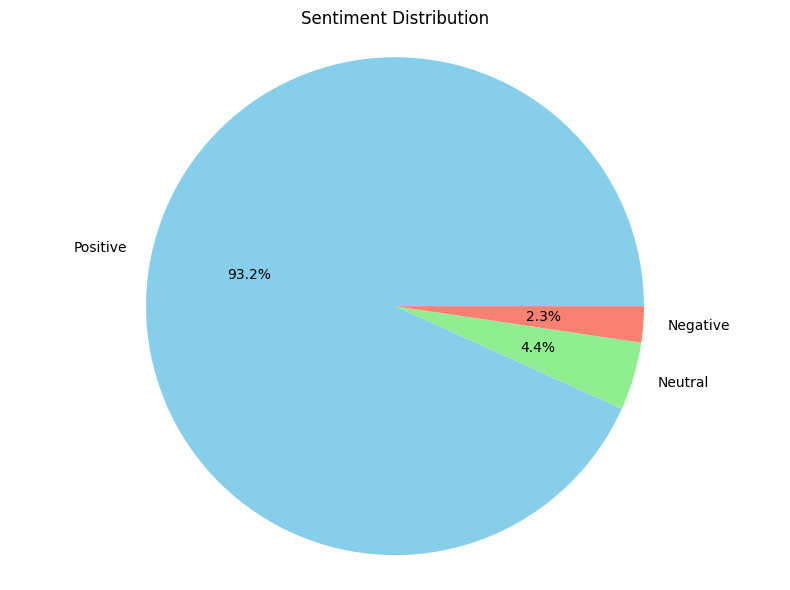

In [ ]:
# Calculate the total number of samples
total_samples = len(df)

# Calculate the number of samples for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Calculate the percentage of each sentiment
sentiment_percentage = (sentiment_counts / total_samples) * 100

# Plot the sentiment distribution in a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_percentage, labels=sentiment_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

#DownSampling

In [ ]:
# Determine target sample size for each class
downsampled_size = 15000
target_sample_sizes = (sentiment_distribution_percentage * downsampled_size).astype(int)

# Downsampling each class to target sample size
downsampled_data = pd.concat([df[df['sentiment'] == sentiment].sample(n=target_sample_sizes[sentiment], replace=False)
                     for sentiment in target_sample_sizes.index])

# Shuffle the downsampled_dataset
downsampled_data = downsampled_data.sample(frac = 1).reset_index(drop = True)

# Save the downsampled dataset to a new file
downsampled_data.to_csv('downsampled_dataset.csv', index=False)

#Class distribution of sentiments after downsampling
Applying downsampling

In [ ]:
# Check class distribution after downsampling
class_distribution = downsampled_data['sentiment'].value_counts()
print("Class distribution after downsampling:")
print(class_distribution)

Class distribution after downsampling:
sentiment
Positive    13985
Neutral       663
Negative      351
Name: count, dtype: int64


#Distribution of ratings after downsampling

<ipython-input-20-9afad5ce55a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=downsampled_data['reviews.rating'], palette="Blues")


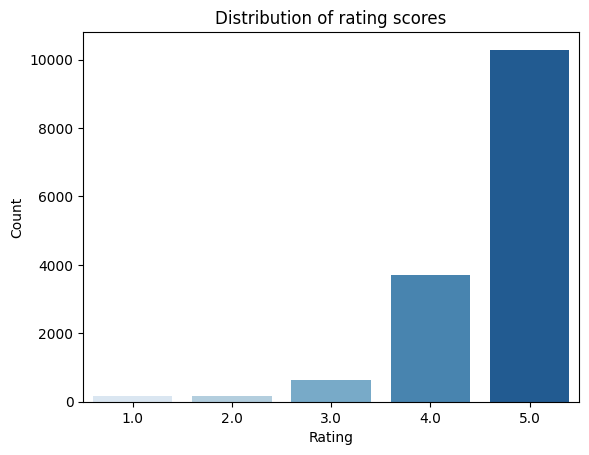

In [ ]:
# distribution of rating
sns.countplot(x=downsampled_data['reviews.rating'], palette="Blues")

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

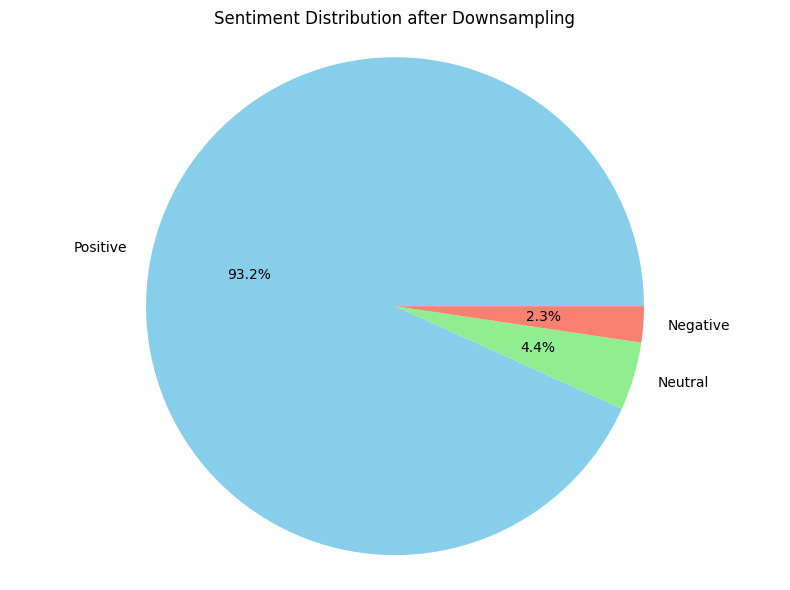

In [ ]:
# Calculate the total number of samples
total_samples = len(downsampled_data)

# Calculate the number of samples for each sentiment
sentiment_counts = downsampled_data['sentiment'].value_counts()

# Calculate the percentage of each sentiment
sentiment_percentage = (sentiment_counts / total_samples) * 100

# Plot the sentiment distribution in a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_percentage, labels=sentiment_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution after Downsampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Plot the distribution of sentiments


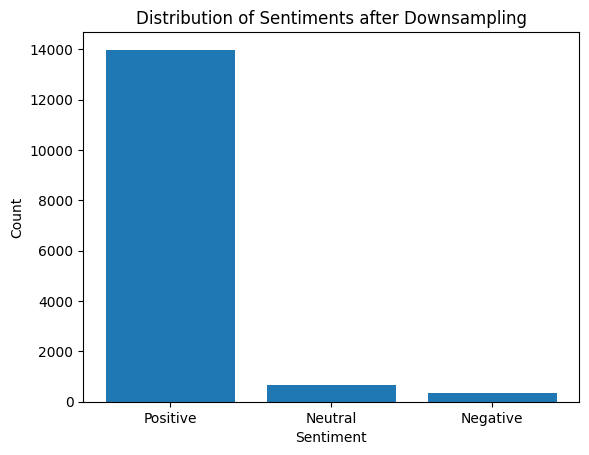

In [ ]:
# Plot the distribution of sentiments
sentiment_distribution = downsampled_data['sentiment'].value_counts()
plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.title('Distribution of Sentiments after Downsampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#Splitting the data into training and test set using Tf-Idf vectorization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the data into features (X) and target (y)
X = downsampled_data['reviews.text']
y = downsampled_data['sentiment']

# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print (f'Train set shape\t:{X_train_tfidf.shape}\nTest set shape\t:{X_test_tfidf.shape}')

# Now you have X_train_tfidf and X_test_tfidf as TF-IDF vectors representing the training and test data respectively


Train set shape	:(11999, 8834)
Test set shape	:(3000, 8834)


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9293333333333333

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        79
     Neutral       0.00      0.00      0.00       133
    Positive       0.93      1.00      0.96      2788

    accuracy                           0.93      3000
   macro avg       0.31      0.33      0.32      3000
weighted avg       0.86      0.93      0.90      3000


Confusion Matrix:
[[   0    0   79]
 [   0    0  133]
 [   0    0 2788]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
